# Busca Linear e as condições de Wolfe

In [39]:
%matplotlib widget

In [40]:
import numpy as np

Vamos analisar o que acontece na função de Rosenbrock:

In [41]:
def rosenbrock(x):
    return (1-x[0])**2+10*(x[1]-x[0]**2)**2

Agora, defina o raio da busca linear:

In [42]:
def phi(alpha, x, p, fun):
    return fun(x+alpha*p)

Observe:

In [43]:
def grad_rosenbrock(x):
    return np.asarray([2+2*x[0]-40*x[0]*(x[1]-x[0]**2), 20*(x[1]-x[0]**2)])

Partindo, por exemplo, do ponto $x=(0,1)$, temos:

In [44]:
x = np.asarray([0,1])

In [45]:
rosenbrock(x)

11

In [46]:
p = -grad_rosenbrock(x)

De fato, $p$ é uma direção de descida:

In [47]:
import numpy as np

print(np.dot(grad_rosenbrock(x), p))

-404


Partindo de $\alpha=1$, temos: 

In [48]:
phi(1, x, p, rosenbrock)

5299

Vamos ver $\phi$:

<IPython.core.display.Javascript object>


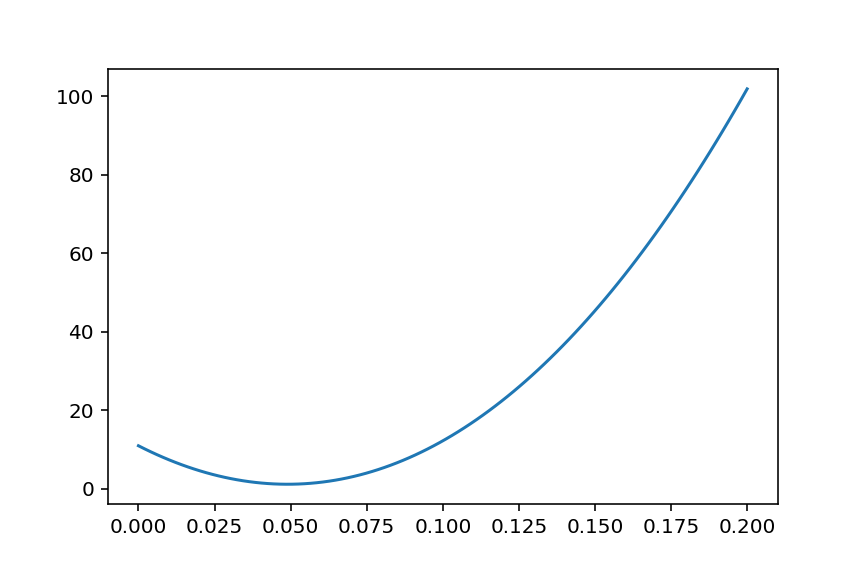

In [49]:
import matplotlib.pyplot as plt

alpha = np.linspace(0, 0.2, 100)
valores_phi = [phi(a, x, p, rosenbrock) for a in alpha]
plt.plot(alpha, valores_phi)

## Condições de Wolfe

<IPython.core.display.Javascript object>


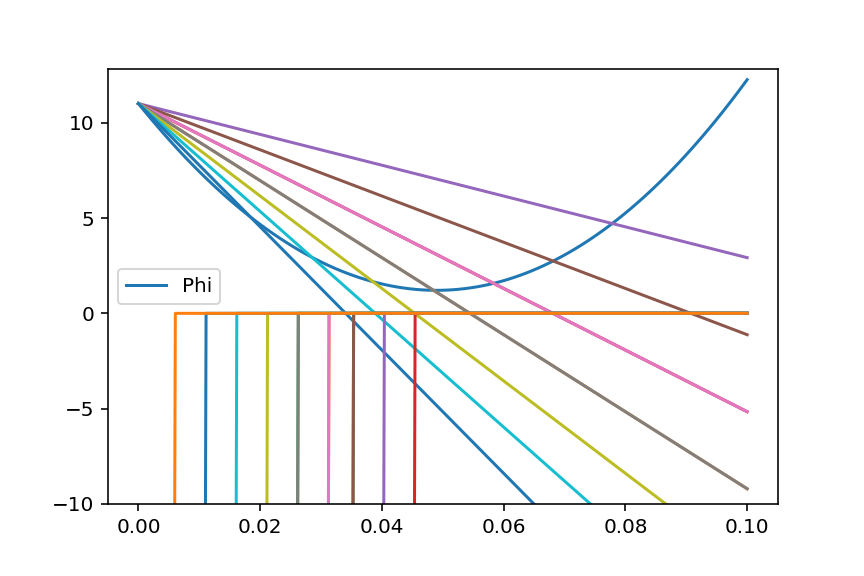

interactive(children=(FloatSlider(value=0.5, description='c_1', max=1.0), Output()), _dom_classes=('widget-int…

interactive(children=(FloatSlider(value=0.5, description='c_2', max=1.0), Output()), _dom_classes=('widget-int…

In [50]:
from ipywidgets import interact

fig, ax = plt.subplots()
alpha = np.linspace(0, 0.1, 100)
valores_phi = [phi(a, x, p, rosenbrock) for a in alpha]
ax.plot(alpha, valores_phi)
ax.set_ylim(bottom=-10)
ax.legend(['Phi', 'Armijo', 'Curvatura'])

# Condição de Armijo:
def set_armijo(c_1):
    valores_armijo = [rosenbrock(x)+c_1*a*np.dot(grad_rosenbrock(x), p) for a in alpha]
    ax.plot(alpha, valores_armijo)
    return ax

# Condição de Curvatura:
def set_curvatura(c_2):
    valores_curvatura = [0 if np.dot(grad_rosenbrock(x+a*p), p) >= c_2*np.dot(grad_rosenbrock(x), p) else -100 for a in alpha]
    ax.plot(alpha, valores_curvatura)
    return ax

interact(set_armijo, c_1=(0, 1.0, 0.1))
interact(set_curvatura, c_2=(0, 1.0, 0.1))
plt.show()